In [220]:
# Importing the libraries
import sys
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

from pandas.plotting import scatter_matrix

In [221]:
## Step 1 - Data collection : Download the data
user = pd.read_csv("C:\PritamData\Zynga\Website_VIP_User_data_10000.csv")

In [222]:
#Removing ID column as its not needed
user = user.iloc[0:10001 , 1:11]

In [223]:
## Step 2: Data exploration and preparation : Exploring and preparing the data ---- 
print("\nFew rows from dataset")
user.head(5)


Few rows from dataset


,IsVIP_500,payment_7_day,dau_days,days_between_install_first_pay,total_txns_7_day,total_page_views,total_product_liked,product_like_rate,total_free_coupon_got,total_bonus_xp_points
0,0,15.98,6,8,3,266,95,0.357143,9,1275000
1,0,8.48,7,372,3,484,118,0.243802,15,1346100
2,0,3.49,7,439,2,504,151,0.299603,10,863400
3,0,3.99,7,570,2,513,165,0.321637,13,2050200
4,0,38.00,3,1741,4,31,6,0.193548,7,3133500


In [224]:
print("\nNo of rows and columns in dataset")
print(user.shape)                                                          ## No of rows and columns
print("\nDatatypes of features")
print(user.dtypes)                                                                ## Structure
print("\nLenght of Dataset : ") 
print(len(user.IsVIP_500))


#print("\nDatatypes of features")
#print(user.dtypes) 


No of rows and columns in dataset
(10001, 10)

Datatypes of features
IsVIP_500                           int64
payment_7_day                     float64
dau_days                            int64
days_between_install_first_pay      int64
total_txns_7_day                    int64
total_page_views                    int64
total_product_liked                 int64
product_like_rate                 float64
total_free_coupon_got               int64
total_bonus_xp_points               int64
dtype: object

Lenght of Dataset : 
10001


Count of class in target variable IsVIP_500
IsVIP_500
0    9846
1     155
dtype: int64

Proportion of class in target variable IsVIP_500
0    98.450155
1     1.549845
Name: IsVIP_500, dtype: float64


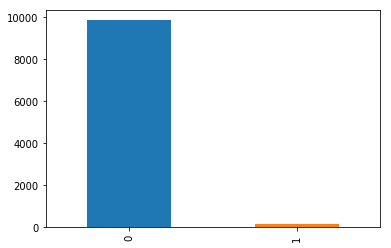

In [225]:
#seperate the features and target
X = user.iloc[:,1:10]
y = user.iloc[:,0]
# Dropping product_like_rate column as its duplicate information column which may lead to cause overfitting due to multicollinearity
user=user.drop('product_like_rate', axis=1)
print("Count of class in target variable IsVIP_500")
print(user.groupby('IsVIP_500').size())                                  ## count
print("\nProportion of class in target variable IsVIP_500")
print(y.value_counts() / (len(user.IsVIP_500)) * 100)   
y.value_counts().plot(kind='bar')   

As we can see here from barplot that the proportion of class in target variable is not even. The majority of class which is 98.45% of the customers are not VIP. This indicates highly imbalanced data.

In [226]:
### Univariate Analysis
print("\nSummary of Numeric Variables\n")
print(X.describe(include=[np.number]))       


Summary of Numeric Variables

       payment_7_day      dau_days  days_between_install_first_pay  \
count   10001.000000  10001.000000                    10001.000000   
mean       21.732978      4.725127                      645.522248   
std        28.614734      2.193795                      867.677542   
min         1.510000      1.000000                        1.000000   
25%         7.150000      3.000000                       17.000000   
50%        11.990000      5.000000                       97.000000   
75%        22.860000      7.000000                     1226.000000   
max       208.930000      7.000000                     3242.000000   

       total_txns_7_day  total_page_views  total_product_liked  \
count      10001.000000      10001.000000         10001.000000   
mean           3.254975        375.029397            94.568943   
std            2.228897        534.204200           156.700696   
min            2.000000         -9.000000           -19.000000   
25%     

As the datatype of all features numeric, the describe() will provide the summary statistics for all features.
Describe() also helps to find missing values. As we can see the count for all variables are same, means no missing values in any column of the dataset.

In [227]:
#   Data Munging - Data Cleaning
#   Options-  1. Remove rows with missing data from dataset Or
#             2. Impute missing values with mean values in your dataset.
print("\tCheck any Null values :")
print(X.isnull().sum())
print("\n\tCheck if all Finite values :")
print(np.isfinite(user).sum())
print("\n\tCheck any NaN values :")
print(np.isnan(X).sum())

	Check any Null values :
payment_7_day                     0
dau_days                          0
days_between_install_first_pay    0
total_txns_7_day                  0
total_page_views                  0
total_product_liked               0
product_like_rate                 0
total_free_coupon_got             0
total_bonus_xp_points             0
dtype: int64

	Check if all Finite values :
IsVIP_500                         10001
payment_7_day                     10001
dau_days                          10001
days_between_install_first_pay    10001
total_txns_7_day                  10001
total_page_views                  10001
total_product_liked               10001
total_free_coupon_got             10001
total_bonus_xp_points             10001
dtype: int64

	Check any NaN values :
payment_7_day                     0
dau_days                          0
days_between_install_first_pay    0
total_txns_7_day                  0
total_page_views                  0
total_product_liked          

There are 40 infinite values in "product_like_rate" which needs to be converted to finite 


In [228]:
X=X.replace([np.inf, -np.inf], 0)                        ## Code to replace any infinite number with NaN
X=X.replace(np.nan, 0)  

#print("\nCheck any Null values :\n", X.isnull().sum())
print("\nCheck if all Finite values :\n")
print(np.isfinite(X).sum())

#print("\nCheck any NaN values :\n", np.isnan(X).sum())
print("\nNull using Lambda")
print(X.apply(lambda x: sum(x.isnull()),axis=0)) 


Check if all Finite values :

payment_7_day                     10001
dau_days                          10001
days_between_install_first_pay    10001
total_txns_7_day                  10001
total_page_views                  10001
total_product_liked               10001
product_like_rate                 10001
total_free_coupon_got             10001
total_bonus_xp_points             10001
dtype: int64

Null using Lambda
payment_7_day                     0
dau_days                          0
days_between_install_first_pay    0
total_txns_7_day                  0
total_page_views                  0
total_product_liked               0
product_like_rate                 0
total_free_coupon_got             0
total_bonus_xp_points             0
dtype: int64


The feature 'product_like_rate' contains 40 infinite values, which are replaced with 0 now

##### Visualizations to Find Outliers if any  OR Univariate Plots

Text(0.5,0,u'payment_7_day')

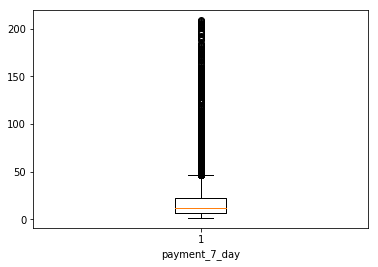

In [229]:
#  Draw a box plot for payment_7_day variable
#  Do you suspect any outliers in payment_7_day ?

payment_7_day = X.iloc[:,0]
plt.boxplot(payment_7_day)
plt.xlabel("payment_7_day")

There are definately outliers in the payment_7_day feature

In [230]:
print("\nGet relevant percentiles and see their distribution")
payment_7_day.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


Get relevant percentiles and see their distribution


0.0      1.51
0.1      4.49
0.2      6.49
0.3      7.99
0.4      9.99
0.5     11.99
0.6     14.00
0.7     18.01
0.8     27.93
0.9     50.99
1.0    208.93
Name: payment_7_day, dtype: float64

Text(0.5,0,u'payment_7_day')

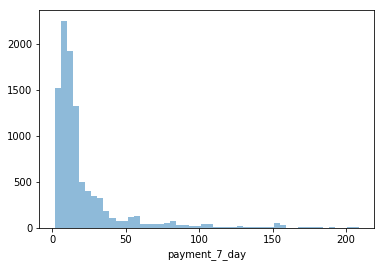

In [231]:
plt.hist(payment_7_day, alpha=0.5, bins=50 )
plt.xlabel("payment_7_day")

The histogram indicates that the dsitribution of payment_7_day is highly (left) skewed


Frequency of Days of Customer Login

7    3420
6    1343
1    1213
2    1089
5    1042
4     975
3     919
Name: dau_days, dtype: int64


Text(0.5,0,u'Days of Customer Login')

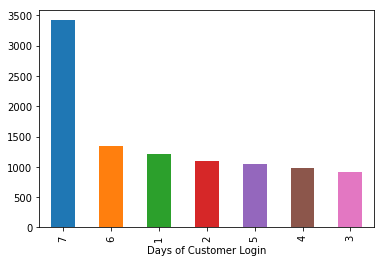

In [232]:
print("\nFrequency of Days of Customer Login\n")
print(X.iloc[:,1].value_counts()) 

X.iloc[:,1].value_counts().plot(kind='bar')
plt.xlabel("Days of Customer Login")

Text(0.5,0,u'No_of_active_days')

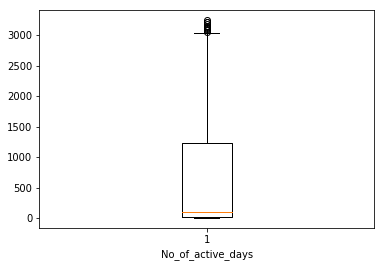

In [233]:
No_of_active_days = X.iloc[:,2]
#No_of_active_days.plot.box()
plt.boxplot(No_of_active_days)
plt.xlabel("No_of_active_days")

Text(0.5,0,u'No_of_active_days')

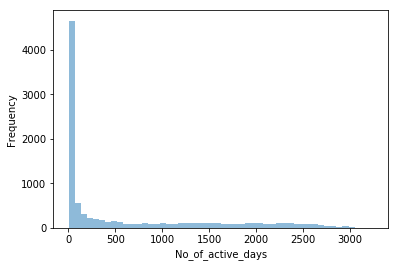

In [234]:
No_of_active_days.plot(kind='hist', alpha=0.5, bins=50)
plt.xlabel("No_of_active_days")

Here we observe that there are few extreme values . 
This is also the reason why 50 bins are required to depict the distribution clearly.
This confirms the presence of a lot of outliers/extreme values.

In [235]:
total_trans = X.iloc[:,3]
print("\nFrequency of total Transactions in 7 days\n")
print(total_trans.value_counts()) 

print("\nGet relevant percentiles and see their distribution")
total_trans.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])


Frequency of total Transactions in 7 days

3     4201
2     3464
4     1188
5      473
6      253
7      128
8       88
9       43
10      35
11      27
13      23
12      20
14      15
16       7
17       5
15       5
18       4
23       4
19       3
20       2
21       2
29       2
24       2
28       1
44       1
41       1
25       1
80       1
22       1
83       1
Name: total_txns_7_day, dtype: int64

Get relevant percentiles and see their distribution


0.0     2.0
0.1     2.0
0.2     2.0
0.3     2.0
0.4     3.0
0.5     3.0
0.6     3.0
0.7     3.0
0.8     4.0
0.9     5.0
1.0    83.0
Name: total_txns_7_day, dtype: float64

Text(0.5,0,u'Total transactions in 7 days')

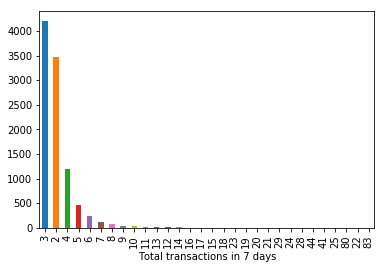

In [236]:
total_trans.value_counts().plot(kind='bar')
plt.xlabel("Total transactions in 7 days")

Text(0.5,0,u'Total page views')

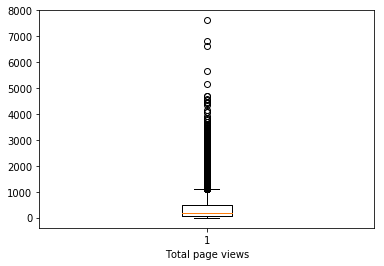

In [237]:
total_page_views = X.iloc[:,4]
plt.boxplot(total_page_views)
plt.xlabel("Total page views")

In [238]:
print("Distribution of total page views")
total_page_views.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

Distribution of total page views


0.0      -9.0
0.1       8.0
0.2      38.0
0.3      75.0
0.4     125.0
0.5     187.0
0.6     270.0
0.7     392.0
0.8     586.0
0.9     965.0
1.0    7620.0
Name: total_page_views, dtype: float64

Text(0.5,0,u'Total page views')

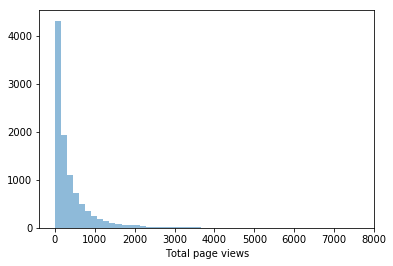

In [239]:
plt.hist(total_page_views, alpha=0.5, bins=50 )
plt.xlabel("Total page views")

Text(0.5,0,u'Total product liked')

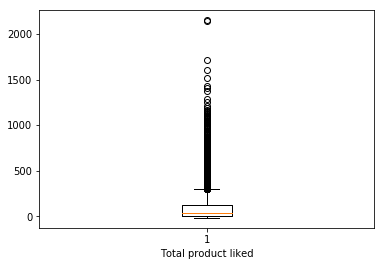

In [240]:
total_product_liked = X.iloc[:,5]
plt.boxplot(total_product_liked)
plt.xlabel("Total product liked")

In [241]:
print("Distribution of total product liked")
total_product_liked.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

Distribution of total product liked


0.0     -19.0
0.1     -11.0
0.2      -3.0
0.3       8.0
0.4      21.0
0.5      39.0
0.6      63.0
0.7      99.0
0.8     154.0
0.9     262.0
1.0    2151.0
Name: total_product_liked, dtype: float64

Something is not right as the 20% of data contain -ve values for product liked.

Text(0.5,0,u'Total product liked')

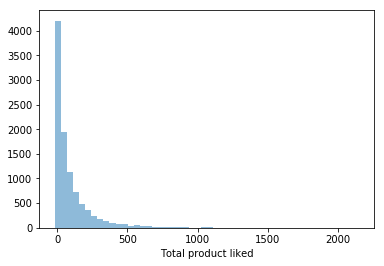

In [242]:
plt.hist(total_product_liked, alpha=0.5, bins=50 )
plt.xlabel("Total product liked")

Need to figure out why product like, page views  and product like rate variables are negative. 

Text(0.5,0,u'total free coupan')

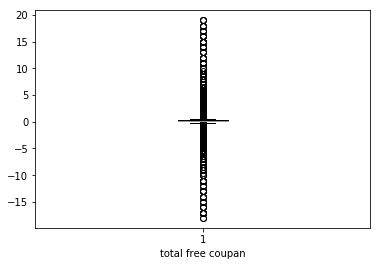

In [243]:
total_free_coupon_got = X.iloc[:,6]
plt.boxplot(total_free_coupon_got)
plt.xlabel("total free coupan")

In [244]:
total_free_coupon_got.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0   -18.000000
0.1    -0.181818
0.2     0.059524
0.3     0.143885
0.4     0.185185
0.5     0.215962
0.6     0.243243
0.7     0.270232
0.8     0.302215
0.9     0.363636
1.0    19.000000
Name: product_like_rate, dtype: float64

Text(0.5,0,u'total free coupan')

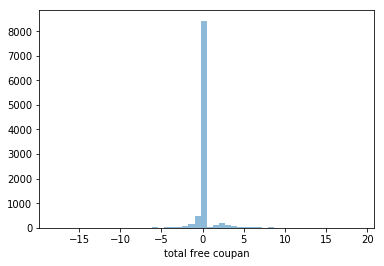

In [245]:
plt.hist(total_free_coupon_got, alpha=0.5, bins=50 )
plt.xlabel("total free coupan")

Text(0.5,0,u'total bonus points')

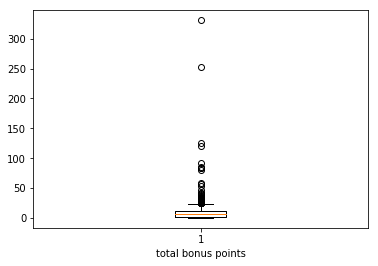

In [246]:
total_bonus_xp_points = X.iloc[:,7]
plt.boxplot(total_bonus_xp_points)
plt.xlabel("total bonus points")

In [247]:
total_bonus_xp_points.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      0.0
0.1      0.0
0.2      1.0
0.3      2.0
0.4      4.0
0.5      6.0
0.6      7.0
0.7      9.0
0.8     12.0
0.9     14.0
1.0    331.0
Name: total_free_coupon_got, dtype: float64

Text(0.5,0,u'total bonus points')

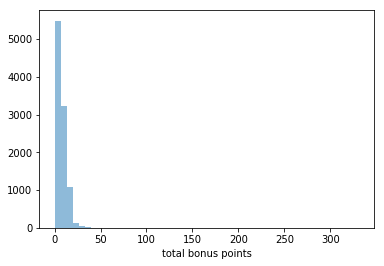

In [248]:
plt.hist(total_bonus_xp_points, alpha=0.5, bins=50 )
plt.xlabel("total bonus points")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020533BA8>,
      dtype=object)

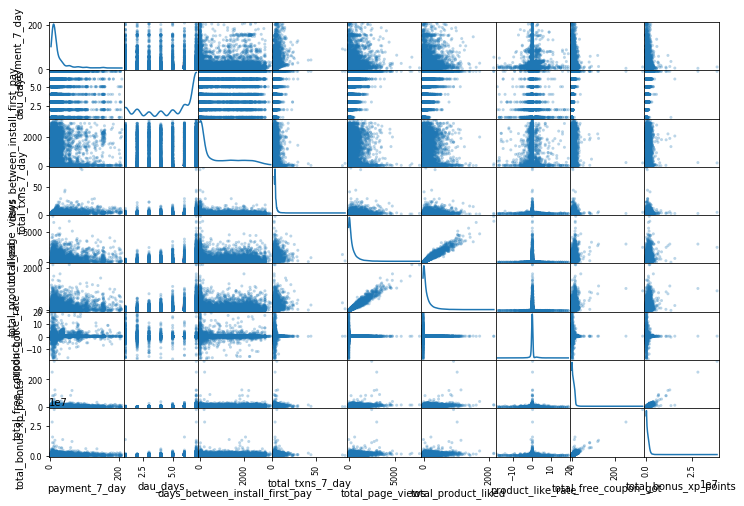

In [249]:
# BiVariate Analysis
scatter_matrix(X,  diagonal='kde', alpha=0.3 ,figsize=(12, 8))

Text(0,0.5,u'VIP')

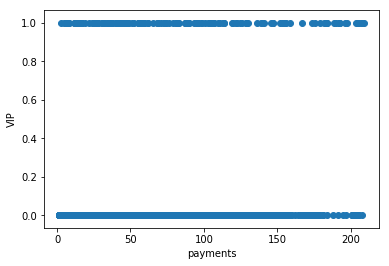

In [250]:
plt.scatter(payment_7_day, y)
plt.xlabel("payments")
plt.ylabel("VIP")

Text(0,0.5,u'VIP')

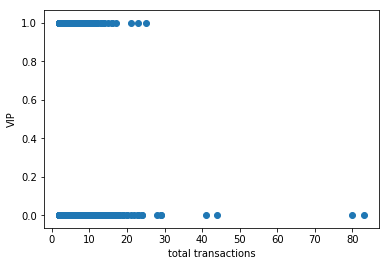

In [251]:
plt.scatter(total_trans, y)
plt.xlabel("total transactions")
plt.ylabel("VIP")

Text(0,0.5,u'VIP')

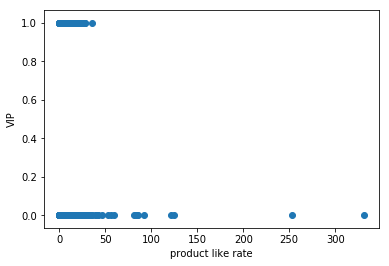

In [252]:
plt.scatter(product_like_rate, y)
plt.xlabel("product like rate")
plt.ylabel("VIP")

                                IsVIP_500  payment_7_day  dau_days  \
IsVIP_500                        1.000000       0.278182  0.072548   
payment_7_day                    0.278182       1.000000 -0.061043   
dau_days                         0.072548      -0.061043  1.000000   
days_between_install_first_pay  -0.021702       0.009763  0.057326   
total_txns_7_day                 0.171964       0.323031  0.152072   
total_page_views                 0.136331       0.163100  0.424546   
total_product_liked              0.139120       0.183088  0.402181   
total_free_coupon_got            0.048275      -0.042190  0.593183   
total_bonus_xp_points            0.044426      -0.036809  0.521665   

                                days_between_install_first_pay  \
IsVIP_500                                            -0.021702   
payment_7_day                                         0.009763   
dau_days                                              0.057326   
days_between_install_first_pay     

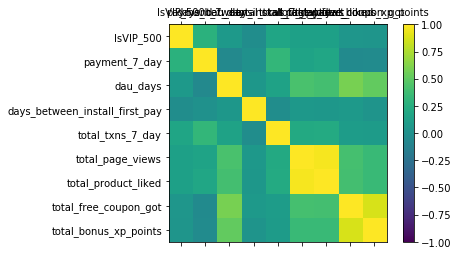

In [253]:
correlations = user.corr()
print(correlations)
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(user.columns)
ax.set_yticklabels(user.columns)
plt.show()

In [254]:
seed = 10
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = seed)

print("Size of Training Dataset - features")
print(X_train.shape)                                                           ## count for X_train
print("\nSize of Testing Dataset - features")
print(X_test.shape)                                                            ## count for X_test

print("\nSize of Training Dataset - target")
print(y_train.count())                                                         ## count for y_train
print("\nSize of Testing Dataset - target")
print(y_test.count())

print("\nCount of IsVIP_500 - train")
print(y_train.value_counts())                                                  ## count
print("\nCount of IsVIP_500 - test")
print(y_test.value_counts()) 

print("\nProportion of IsVIP_500 - train\n")
print(y_train.value_counts() / (len(y_train)) * 100)                                     ## proportion
print("\nProportion of IsVIP_500 - test\n")
print(y_test.value_counts() / (len(y_test)) * 100)

Size of Training Dataset - features
(7000, 9)

Size of Testing Dataset - features
(3001, 9)

Size of Training Dataset - target
7000

Size of Testing Dataset - target
3001

Count of IsVIP_500 - train
0    6894
1     106
Name: IsVIP_500, dtype: int64

Count of IsVIP_500 - test
0    2952
1      49
Name: IsVIP_500, dtype: int64

Proportion of IsVIP_500 - train

0    98.485714
1     1.514286
Name: IsVIP_500, dtype: float64

Proportion of IsVIP_500 - test

0    98.367211
1     1.632789
Name: IsVIP_500, dtype: float64


The proportion of class looks fine in the Train and Test dataset and 
the proportion is pretty much similar to original dataset proportion.
Since the data has many outliers, lets transform the data in useful format.
Since the data has many outliers its not good choice to normalize it as it will fit the data in (0,1) will supress the impact of outliers. Transforming the data using the log function is again not a good idea as data has many -ve values. 
So I decided to standardize the data for modeling.

In [255]:
### Feature scaling  --- Normalization
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train))
print("Data after Standardization")
print(X_train.head(5))                                                 
print("\nTrain - Summary Stats after Standardization")
print(X_train.describe())

X_test = pd.DataFrame(sc.transform(X_test))
print("\nData after Standardization")
print(X_test.head(5))  
print("\nTest - Summary Stats after Standardization")
print(X_test.describe())

Data after Standardization
          0         1         2         3         4         5         6  \
0 -0.374995  0.577552  1.937446 -0.119412  0.085007  0.374114  0.070935   
1 -0.427368  0.577552 -0.727179 -0.591394 -0.277066 -0.409501 -0.062867   
2 -0.410026 -0.337433 -0.744496 -0.591394 -0.386442 -0.306732  0.018881   
3 -0.028850  0.120059 -0.380824  0.352571 -0.295923 -0.146155  0.050692   
4 -0.305974 -0.337433 -0.744496 -0.591394 -0.299695 -0.313155 -0.017934   

          7         8  
0 -0.929947 -0.807792  
1  0.018504 -0.006015  
2 -0.387975 -0.452022  
3 -0.252482  0.447754  
4 -0.252482 -0.345290  

Train - Summary Stats after Standardization
                  0             1             2             3             4  \
count  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03  7.000000e+03   
mean  -1.109906e-16  1.459785e-16  2.991258e-17 -3.717007e-16  4.402827e-17   
std    1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00  1.000071e+00   
min   -7.041452e-

In [256]:
# Model Training:  Training a model on the data ----
classifier = DecisionTreeClassifier(random_state=seed)                   ## Using default decision tree
classifier.fit(X_train, y_train)
print("Classifier :", classifier)

('Classifier :', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'))


In [257]:
# Model Evaluation : Evaluating model performance ----
t0=time()
y_pred = classifier.predict(X_test)
print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1])/ (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0])/ (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(classifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(classifier.score(X_test, y_test, sample_weight=None))

('\nPredictions time:', 0.001, 's')

Confusion matrix after prediction
[[2910   42]
 [  39   10]]

Accuracy %: 
97.30089970009996

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2952
          1       0.19      0.20      0.20        49

avg / total       0.97      0.97      0.97      3001


ROC AUC Score: 
0.5949269951883193

F1 Score: 
0.19801980198019803

Sensitivity : 
0.20408163265306123

Specificity : 
0.9857723577235772

Training Accuracy : 
1.0

Testing Accuracy : 
0.9730089970009996


A ROC space is defined by FPR and TPR as x and y axes, respectively, which depicts relative trade-offs between true positive (benefits) and false positive (costs). Since TPR is equivalent to sensitivity(recall - TP/Condition Positive) and FPR is equal to 1 − specificity, the ROC graph is sometimes called the sensitivity vs (1 − specificity) plot.
FPR = 1 - TNR (TN / Condition Negative).

The kappa statistic adjusts accuracy by accounting for the possibility of a correct prediction by chance alone. This is
especially important for datasets with a severe class imbalance, because a classifier can obtain high accuracy simply by always guessing the most frequent class. Thekappa statistic will only reward the classifier if it is correct more often than this
simplistic strategy.Kappa values range from 0 to a maximum of 1, which indicates perfect agreement between the model's predictions and the true values. Values less than one indicate imperfect agreement.
Using the suggested interpretation, we note that there is very good agreement between the classifier's predictions and the actual values.

The precision  is defined as the proportion of positive examples that are truly positive; in other words, when a model
predicts the positive class, how often is it correct? A precise model will only predict the positive class in cases that are very likely to be positive. It will be very trustworthy.

F1 Score - A measure of model performance that combines precision and recall into a single number is known as the F-measure (also sometimes called the F1 score or F-score).The F-measure combines precision and recall using the harmonic mean, a type of
average that is used for rates of change. The harmonic mean is used rather than the common arithmetic mean since both precision and recall are expressed as proportions between zero and one, which can be interpreted as rates.

In this case sensitivity which is True positive rate is significantly 0.14 low [When customer is VIP only 14% VIP customers correctly classified] where as Specificity is 0.98 [98% Non VIP customers correctly classified]. So model is able to do better prediction for class Non VIP than VIP

In this case, the precision for positive class is only 12% means when model predicts positive class, only 12% of the time predictions are correct.
F-score also indicates that the model is performing well for NonVIP class than VIP class.
So over all this model is not performing well in prediction of VIP customers.

Here, business objective to identify positive class is critical or identify VIP customers accurately is critical. Identifying NonVIP as VIP is acceptable but predicting VIP as nonVIP will affect business and its more critical. So, Here the objective should be optimize the sensitivity.
Also the training accuracy is 100% and testing accuracy is lowered, which clearly indicates that the model is overfitted.

In [258]:
## Model Improvement
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
#sc = StandardScaler()
#X_train = pd.DataFrame(sc.fit_transform(X_train))
#X_test = pd.DataFrame(sc.fit_transform(X_test))

print("\nModel Improvement Using criterion='gini' and min_samples_leaf=5 and max_depth=3\n")
giniclassifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
giniclassifier.fit(X_train, y_train)
print("Classifier :"),
print(giniclassifier)

y_pred = classifier.predict(X_test)
print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1]) / (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0]) / (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(giniclassifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(giniclassifier.score(X_test, y_test, sample_weight=None))


Model Improvement Using criterion='gini' and min_samples_leaf=5 and max_depth=3

Classifier : DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
('\nPredictions time:', 0.079, 's')

Confusion matrix after prediction
[[2910   42]
 [  39   10]]

Accuracy %: 
97.30089970009996

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2952
          1       0.19      0.20      0.20        49

avg / total       0.97      0.97      0.97      3001


ROC AUC Score: 
0.5949269951883193

F1 Score: 
0.19801980198019803

Sensitivity : 
0.20408163265306123

Specificity : 
0.9857723577235772

Training Accuracy : 
0.9848571428571429

Testin

With this decisionTreeClassifier, I see recall is little bit improved from 12% to 19%

In [259]:
### Using RandomForestClassifier and criterion='entropy'
ranforestclassifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
ranforestclassifier.fit(X_train, y_train)
print("Random Forest Classifier :", ranforestclassifier)
t0=time()
y_pred = ranforestclassifier.predict(X_test)

print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1]) / (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0]) / (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(ranforestclassifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(ranforestclassifier.score(X_test, y_test, sample_weight=None))        

('Random Forest Classifier :', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))
('\nPredictions time:', 0.005, 's')

Confusion matrix after prediction
[[2952    0]
 [  49    0]]

Accuracy %: 
98.3672109296901

Classification Report:
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2952
          1       0.00      0.00      0.00        49

avg / total       0.97      0.98      0.98      3001


ROC AUC Score: 
0.5

F1 Score: 
0.0

Sensitivity : 
0.0

Specificity : 
1.0

Training Accuracy : 
0.9848571428571429

Testing Accuracy : 
0.9836721092969011


Random Forest does not look like working here

In [260]:
### ignore
gradientboostingclassifier = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
    max_depth=4, random_state=0)
gradientboostingclassifier.fit(X_train, y_train)
print("Gradient Boosting Classifier :", gradientboostingclassifier)
t0=time()
y_pred = gradientboostingclassifier.predict(X_test)

print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1]) / (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0]) / (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(gradientboostingclassifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(gradientboostingclassifier.score(X_test, y_test, sample_weight=None))        

('Gradient Boosting Classifier :', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False))
('\nPredictions time:', 0.001, 's')

Confusion matrix after prediction
[[2926   26]
 [  43    6]]

Accuracy %: 
97.70076641119627

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      2952
          1       0.19      0.12      0.15        49

avg / total       0.97      0.98      0.97      3001


ROC AUC Score: 
0.5568206957579779

F1 Score: 
0.1481481481481481

Sensitivity : 
0.12244897959183673

Specificity : 
0.9911924

Gradient Boosting also does not look like helping much.
So from above outputs we can clearly see the CART model is not good choice here as the max sensitivity 
we are getting ever after tunning  is not going over 18%.
So, I decided to use K fold validation here to compare diffrent models for Recall. We need to find best model which will 
work improve accuracy for classifiying VIP customers.

In [261]:
## Ignore
#xgb = XGBClassifier(max_depth=4, learning_rate=0.05, n_estimators=200,
#                        objective='multi:softprob', gamma=0., 
#                        max_delta_step=0., subsample=0.9, colsample_bytree=0.9,
#                        seed=0) 

In [262]:
## implement Logistic Regression
#training_features = ['payment_7_day', 'dau_days', 'days_between_install_first_pay',
# 'total_txns_7_day', 'total_page_views', 'total_product_liked', 'total_free_coupon_got', 'total_bonus_xp_points']

#X_train, X_test, y_train, y_test = train_test_split(X[training_features], y, test_size = 0.30, random_state = 0)
#print(X_train.columns.values)
#sc = StandardScaler()
#X_train = pd.DataFrame(sc.fit_transform(X_train))
#X_test = pd.DataFrame(sc.fit_transform(X_test))
#print(X_train.columns.values)

In [263]:
#trained_logistic_regression_model = train_logistic_regression(train_x, train_y)
logitClassifier = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                   class_weight=None, random_state=None, solver='liblinear', 
                   max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

logitClassifier.fit(X_train, y_train)
print("Logistic Regression Classifier :", logitClassifier)
t0=time()
y_pred = logitClassifier.predict(X_test)

print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1]) / (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0]) / (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(logitClassifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(logitClassifier.score(X_test, y_test, sample_weight=None))      

('Logistic Regression Classifier :', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))
('\nPredictions time:', 0.0, 's')

Confusion matrix after prediction
[[2949    3]
 [  43    6]]

Accuracy %: 
98.46717760746418

Classification Report:
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2952
          1       0.67      0.12      0.21        49

avg / total       0.98      0.98      0.98      3001


ROC AUC Score: 
0.5607163597146175

F1 Score: 
0.20689655172413793

Sensitivity : 
0.12244897959183673

Specificity : 
0.9989837398373984

Training Accuracy : 
0.9855714285714285

Testing Accuracy : 
0.9846717760746417


In [264]:
### K fold validation

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("\n[%s] Mean: %.8f Std. Dev.: %8f" %(name, cv_results.mean(), cv_results.std()))



[LR] Mean: 0.09170899 Std. Dev.: 0.087238

[LDA] Mean: 0.41897894 Std. Dev.: 0.126532

[KNN] Mean: 0.01394231 Std. Dev.: 0.028071

[CART] Mean: 0.15899392 Std. Dev.: 0.090844

[NB] Mean: 0.50248432 Std. Dev.: 0.164619

[SVM] Mean: 0.00000000 Std. Dev.: 0.000000


Ok, So from results we see that Naive bayes and linear descriminant analysis are working pretty well in classifing  VIP cumstomer. So I will choose Naive bayes for futher training and prediction.

In [265]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import svm

scoring = ['recall']
clf = GaussianNB()
scores = cross_validate(clf, X_train, y_train, scoring=scoring, cv=10, return_train_score=False)
print(sorted(scores.keys()))
print("\nScores for GaussianNB Kfold 10 : ")
print(scores)                    

clf.fit(X_train, y_train)
t0=time()
y_pred = clf.predict(X_test)

print("\nPredictions time:", round(time()-t0, 3), "s")
print("\nConfusion matrix after prediction")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nAccuracy %: ")
print(accuracy_score(y_test, y_pred)*100)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))                                                  #(tn, fp, fn, tp)

print("\nROC AUC Score: ")
print(roc_auc_score(y_test, y_pred))

print("\nF1 Score: ")
print(f1_score(y_test, y_pred))

print("\nSensitivity : ")
print(float(cm[1][1]) / (cm[1][0]+cm[1][1]))

print("\nSpecificity : ")
print(float(cm[0][0]) / (cm[0][0]+cm[0][1])) 

## Accuracy using classifier function
print("\nTraining Accuracy : ")
print(logitClassifier.score(X_train, y_train, sample_weight=None))
print("\nTesting Accuracy : ")
print(logitClassifier.score(X_test, y_test, sample_weight=None))  

['fit_time', 'score_time', 'test_recall']

Scores for GaussianNB Kfold 10 : 
{'score_time': array([0.00400019, 0.00099993, 0.00100017, 0.00099993, 0.        ,
       0.00300002, 0.        , 0.00099993, 0.        , 0.00200009]), 'fit_time': array([0.        , 0.00300002, 0.00300002, 0.00499988, 0.00400019,
       0.0059998 , 0.00300002, 0.00600004, 0.00600004, 0.00300002]), 'test_recall': array([0.54545455, 0.54545455, 0.18181818, 0.45454545, 0.45454545,
       0.81818182, 0.4       , 0.2       , 0.6       , 0.5       ])}
('\nPredictions time:', 0.0, 's')

Confusion matrix after prediction
[[2767  185]
 [  20   29]]

Accuracy %: 
93.1689436854382

Classification Report:
             precision    recall  f1-score   support

          0       0.99      0.94      0.96      2952
          1       0.14      0.59      0.22        49

avg / total       0.98      0.93      0.95      3001


ROC AUC Score: 
0.7645836790000553

F1 Score: 
0.22053231939163498

Sensitivity : 
0.5918367346938775

Spe

So, Naive Bayes classfier worked well in this case of imbalanced data classfication. 
The Racall or sensitivity is improved in this algorithm to 59%.  Also the training and testing accuracy are close to 98% 
indicates that model is not overfitted.